<a href="https://colab.research.google.com/github/robertbarac/Notas_Curso_Redes_Neuronales_TensorFlow/blob/main/main_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import zipfile
import os
!pip install -q -U keras-tuner
import keras as kt
from tensorflow import keras

     |████████████████████████████████| 135 kB 29.3 MB/s 
     |████████████████████████████████| 1.6 MB 51.0 MB/s 


In [ ]:
!wget --no-check-certificate https://storage.googleapis.com/platzi-tf2/sign-language-img.zip \
    -O /tmp/sign-language-img.zip

--2022-11-08 17:54:51--  https://storage.googleapis.com/platzi-tf2/sign-language-img.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.24.128, 172.217.194.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.24.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 24265584 (23M) [application/zip]
Saving to: ‘/tmp/sign-language-img.zip’

/tmp/sign-language- 100%[===================>]  23.14M  9.20MB/s    in 2.5s    

2022-11-08 17:54:54 (9.20 MB/s) - ‘/tmp/sign-language-img.zip’ saved [24265584/24265584]



In [ ]:
local_zip = "/tmp/sign-language-img.zip"
zip_ref = zipfile.ZipFile(local_zip, "r")
zip_ref.extractall("/tmp/sign-language-img")
zip_ref.close()

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import matplotlib.image as mpimg
import string
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = "/tmp/sign-language-img/Train"
test_dir = "/tmp/sign-language-img/Test"

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255)
test_datagen = ImageDataGenerator(rescale=1/255, validation_split=0.2)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (28, 28),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "grayscale", 
    subset = "training"
)

validation_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (28, 28),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "grayscale", 
    subset = "validation"
)

test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (28, 28),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "grayscale", #asume el subset = 'test'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
classes = [char for char in string.ascii_uppercase if char != "J" if char != "Z"]
classes

['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y']

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(10,10))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis("off")
  plt.tight_layout()
  plt.show()

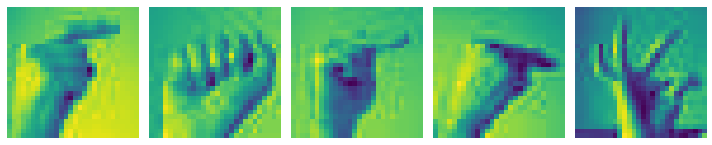

In [ ]:
sample_training_images, _ = next(train_generator)
plotImages(sample_training_images[:5])

#Modelo

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D

In [ ]:
modelo_base = Sequential([
    Flatten(input_shape = (28,28,1)), 
    Dense(256, activation='relu'), 
    Dense(128, activation='relu'),
    Dense(len(classes), activation='softmax'),
])

In [ ]:
modelo_base.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = modelo_base.fit(
    train_generator, 
    epochs = 20, 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 12s 37ms/step - loss: 2.1695 - accuracy: 0.3583 - val_loss: 1.6495 - val_accuracy: 0.4723
Epoch 2/20
215/215 [==============================] - 7s 34ms/step - loss: 1.2157 - accuracy: 0.6306 - val_loss: 1.2778 - val_accuracy: 0.6049
Epoch 3/20
215/215 [==============================] - 7s 34ms/step - loss: 0.8875 - accuracy: 0.7263 - val_loss: 1.2706 - val_accuracy: 0.6267
Epoch 4/20
215/215 [==============================] - 7s 32ms/step - loss: 0.6536 - accuracy: 0.8038 - val_loss: 1.1303 - val_accuracy: 0.6442
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.4913 - accuracy: 0.8549 - val_loss: 1.1224 - val_accuracy: 0.6540
Epoch 6/20
215/215 [==============================] - 7s 30ms/step - loss: 0.3720 - accuracy: 0.8942 - val_loss: 1.0200 - val_accuracy: 0.6961
Epoch 7/20
215/215 [==============================] - 6s 30ms/step - loss: 0.2898 - accuracy: 0.9195 - val_loss: 1.0273 - val_accuracy: 0.710

In [ ]:
results = modelo_base.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 1.2436 - accuracy: 0.7752


In [ ]:
def visualizar_resultados(history):
  epochs = [i for i in range(20)]
  fig, ax = plt.subplots(1,2)
  train_acc = history.history['accuracy']
  train_loss = history.history['loss']
  val_acc = history.history['val_accuracy']
  val_loss = history.history['val_loss']
  fig.set_size_inches(16, 9)

  ax[0].plot(epochs, train_acc, "go-", label="Entrenamiento accuracy")
  ax[0].plot(epochs, val_acc, "ro-", label="Validación accuracy")
  ax[0].set_title("Entrenamiento y Validación")
  ax[0].legend()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")

  ax[1].plot(epochs, train_loss, "go-", label="Entrenamiento loss")
  ax[1].plot(epochs, val_loss, "ro-", label="Validación loss")
  ax[1].set_title("Entrenamiento y Validación del loss")
  ax[1].legend()
  ax[1].set_xlabel("Epochs")
  ax[1].set_ylabel("Loss")

  plt.show()

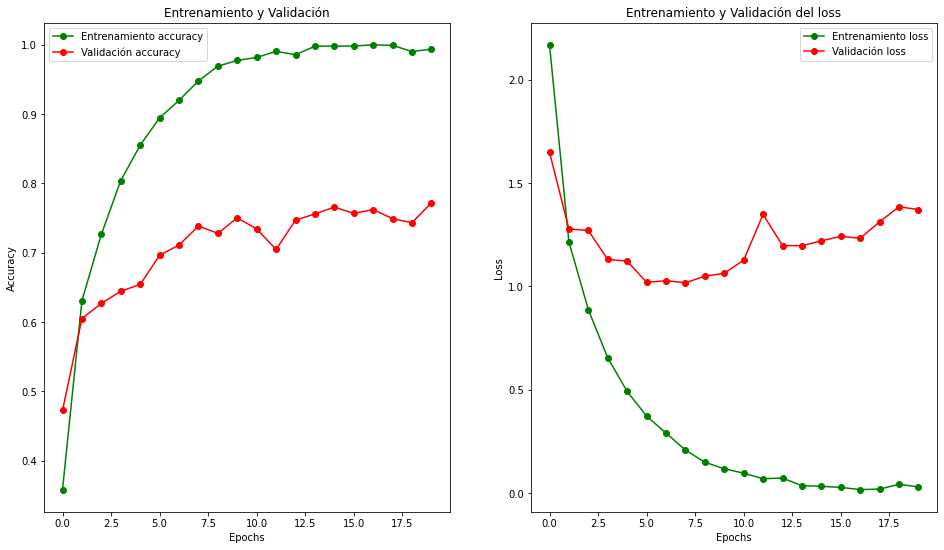

In [ ]:
visualizar_resultados(history)

*Optimicemos los modelos*

In [ ]:
modelo_optimizado = Sequential([
    Flatten(input_shape = (28,28,1)), 
    Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'), 
    Dropout(0.2), 
    Dense(128, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'),
    Dropout(0.2),
    Dense(len(classes), activation='softmax'),
])

In [ ]:
modelo_optimizado.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history2 = modelo_optimizado.fit(
    train_generator, 
    epochs = 20, 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 7s 31ms/step - loss: 2.5395 - accuracy: 0.2314 - val_loss: 1.7789 - val_accuracy: 0.4828
Epoch 2/20
215/215 [==============================] - 7s 31ms/step - loss: 1.5709 - accuracy: 0.4857 - val_loss: 1.3469 - val_accuracy: 0.5930
Epoch 3/20
215/215 [==============================] - 7s 31ms/step - loss: 1.1938 - accuracy: 0.6073 - val_loss: 1.1432 - val_accuracy: 0.6309
Epoch 4/20
215/215 [==============================] - 6s 30ms/step - loss: 0.9615 - accuracy: 0.6819 - val_loss: 0.9589 - val_accuracy: 0.6793
Epoch 5/20
215/215 [==============================] - 7s 31ms/step - loss: 0.7935 - accuracy: 0.7361 - val_loss: 0.9289 - val_accuracy: 0.6919
Epoch 6/20
215/215 [==============================] - 7s 31ms/step - loss: 0.6727 - accuracy: 0.7739 - val_loss: 0.8252 - val_accuracy: 0.7095
Epoch 7/20
215/215 [==============================] - 8s 35ms/step - loss: 0.5752 - accuracy: 0.8075 - val_loss: 0.8700 - val_accuracy: 0.7270

In [ ]:
results2 = modelo_optimizado.evaluate(test_generator)

57/57 [==============================] - 2s 28ms/step - loss: 0.7948 - accuracy: 0.8026


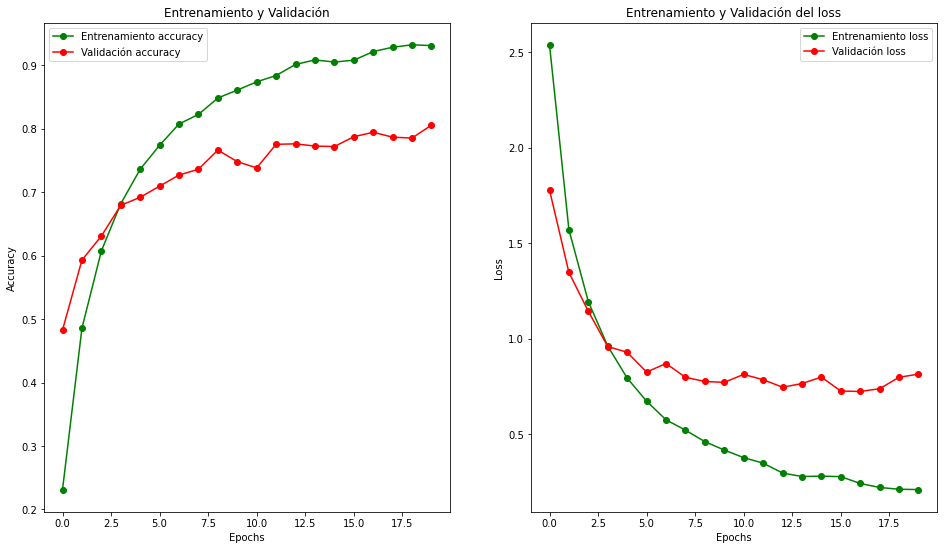

In [ ]:
visualizar_resultados(history2)

In [ ]:
modelo_convolucion = Sequential([
    Conv2D(75, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'), 
    Dropout(0.2), 
    Dense(128, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'),
    Dropout(0.2),
    Dense(len(classes), activation='softmax'),
])
modelo_convolucion.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history3 = modelo_convolucion.fit(
    train_generator, 
    epochs = 20, 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 14s 34ms/step - loss: 1.6301 - accuracy: 0.5195 - val_loss: 0.7653 - val_accuracy: 0.7635
Epoch 2/20
215/215 [==============================] - 7s 35ms/step - loss: 0.3339 - accuracy: 0.9042 - val_loss: 0.6361 - val_accuracy: 0.8098
Epoch 3/20
215/215 [==============================] - 8s 38ms/step - loss: 0.1256 - accuracy: 0.9734 - val_loss: 0.6148 - val_accuracy: 0.8281
Epoch 4/20
215/215 [==============================] - 7s 34ms/step - loss: 0.0727 - accuracy: 0.9888 - val_loss: 0.6738 - val_accuracy: 0.8393
Epoch 5/20
215/215 [==============================] - 8s 35ms/step - loss: 0.0528 - accuracy: 0.9938 - val_loss: 0.6526 - val_accuracy: 0.8533
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0446 - accuracy: 0.9956 - val_loss: 0.7250 - val_accuracy: 0.8400
Epoch 7/20
215/215 [==============================] - 7s 33ms/step - loss: 0.0426 - accuracy: 0.9958 - val_loss: 0.7033 - val_accuracy: 0.858

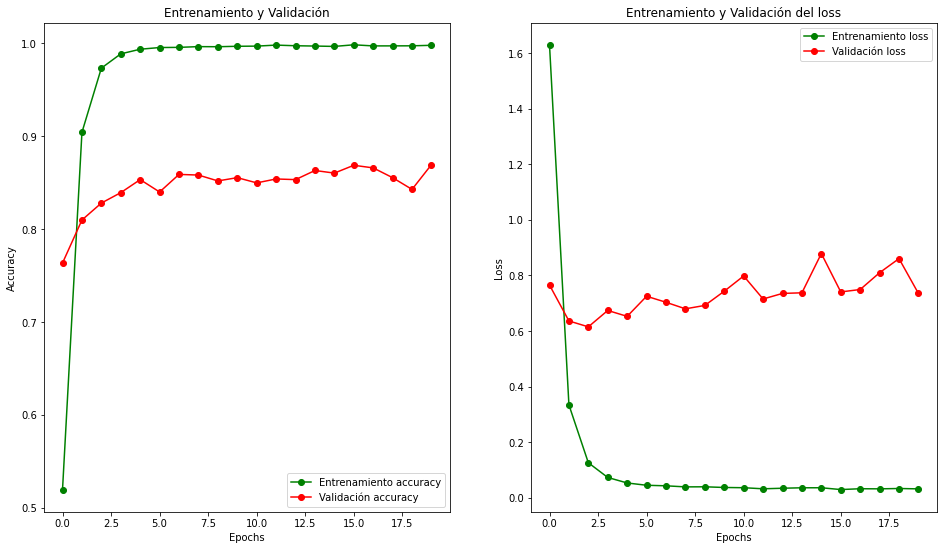

In [ ]:
visualizar_resultados(history3)

In [ ]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if logs.get("accuracy") > 0.95:
      print("Llegamos al 95%")
      self.model.stop_training = True

callback = TrainingCallback()

modelo_callback = Sequential([
    Conv2D(75, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2,2)),
    Flatten(), 
    Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'), 
    Dropout(0.2), 
    Dense(128, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'),
    Dropout(0.2),
    Dense(len(classes), activation='softmax'),
])
modelo_callback.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_callback = modelo_callback.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [callback],
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 8s 34ms/step - loss: 1.5011 - accuracy: 0.5520 - val_loss: 0.7129 - val_accuracy: 0.7467
Epoch 2/20
215/215 [==============================] - 7s 33ms/step - loss: 0.2809 - accuracy: 0.9247 - val_loss: 0.5690 - val_accuracy: 0.8379
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 0.1068 - accuracy: 0.9792 - val_loss: 0.5718 - val_accuracy: 0.8393


In [ ]:
resultado_callback = modelo_callback.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 0.5417 - accuracy: 0.8480


**EarlyStopping**

In [ ]:
def modelo():
  modelo = Sequential([
      Conv2D(75, (3, 3), activation = 'relu', input_shape=(28, 28, 1)),
      MaxPooling2D((2,2)),
      Flatten(), 
      Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'), 
      Dropout(0.2), 
      Dense(128, kernel_regularizer = tf.keras.regularizers.l2(1e-5),activation='relu'),
      Dropout(0.2),
      Dense(len(classes), activation='softmax'),
  ])
  return modelo

In [ ]:
modelo = modelo()
modelo.summary()
modelo.compile(
    optimizer = 'adam', 
    loss = "categorical_crossentropy", 
    metrics = ["accuracy"]
)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 12675)             0         
                                                                 
 dense_12 (Dense)            (None, 256)               3245056   
                                                                 
 dropout_6 (Dropout)         (None, 256)               0         
                                                                 
 dense_13 (Dense)            (None, 128)               32896     
                                                      

In [ ]:
callback_early = tf.keras.callbacks.EarlyStopping(monitor = 'loss', patience = 3, mode = "auto")

In [ ]:
history_early = modelo.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [callback_early], 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 8s 34ms/step - loss: 1.8500 - accuracy: 0.4381 - val_loss: 0.8362 - val_accuracy: 0.7333
Epoch 2/20
215/215 [==============================] - 7s 33ms/step - loss: 0.4846 - accuracy: 0.8492 - val_loss: 0.6044 - val_accuracy: 0.7993
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 0.2013 - accuracy: 0.9471 - val_loss: 0.5127 - val_accuracy: 0.8288
Epoch 4/20
215/215 [==============================] - 8s 37ms/step - loss: 0.1089 - accuracy: 0.9769 - val_loss: 0.5784 - val_accuracy: 0.8421
Epoch 5/20
215/215 [==============================] - 7s 33ms/step - loss: 0.0788 - accuracy: 0.9855 - val_loss: 0.6055 - val_accuracy: 0.8393
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0585 - accuracy: 0.9911 - val_loss: 0.6400 - val_accuracy: 0.8456
Epoch 7/20
215/215 [==============================] - 7s 33ms/step - loss: 0.0509 - accuracy: 0.9934 - val_loss: 0.6355 - val_accuracy: 0.8519

In [ ]:
modelo.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 0.7060 - accuracy: 0.8699


[0.7059701085090637, 0.8699107766151428]

## Vamos a usar autotuner de Keras

In [ ]:
import keras_tuner

In [ ]:
def constructor_de_modelo(hp):
  modelo = Sequential()
  modelo.add(Conv2D(75, (3, 3), activation = 'relu', input_shape=(28, 28, 1)))
  modelo.add(MaxPooling2D((2,2)))
  modelo.add(Flatten())
  hp_units = hp.Int("units", min_value = 32, max_value = 512, step = 32)
  modelo.add(Dense(256, kernel_regularizer = tf.keras.regularizers.l2(1e-5), activation='relu'))
  modelo.add(Dropout(0.2))
  modelo.add(Dense(128, kernel_regularizer = tf.keras.regularizers.l2(1e-5), activation='relu'))
  modelo.add(Dropout(0.2))
  modelo.add(Dense(len(classes), activation='softmax'))

  hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4])

  modelo.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate), loss = 'categorical_crossentropy', metrics = ['accuracy'])
  return modelo

In [ ]:
tuner = keras_tuner.Hyperband(
    constructor_de_modelo, 
    objective = "val_accuracy", 
    max_epochs = 20, 
    factor = 3, 
    directory = "models/", 
    project_name = "platzi-tunner"
)

In [ ]:
tuner.search(train_generator, epochs = 20, validation_data = validation_generator)

best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

Trial 30 Complete [00h 02m 26s]
val_accuracy: 0.8533333539962769

Best val_accuracy So Far: 0.870877206325531
Total elapsed time: 00h 29m 02s


In [ ]:
print(best_hps.get("units"))
print(best_hps.get("learning_rate"))

384
0.001


In [ ]:
hypermodel = tuner.hypermodel.build(best_hps)
history_hypermodel = hypermodel.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [callback_early], 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 9s 37ms/step - loss: 1.5985 - accuracy: 0.5193 - val_loss: 0.7534 - val_accuracy: 0.7600
Epoch 2/20
215/215 [==============================] - 7s 33ms/step - loss: 0.3389 - accuracy: 0.9030 - val_loss: 0.5664 - val_accuracy: 0.8393
Epoch 3/20
215/215 [==============================] - 7s 33ms/step - loss: 0.1336 - accuracy: 0.9710 - val_loss: 0.5282 - val_accuracy: 0.8400
Epoch 4/20
215/215 [==============================] - 8s 37ms/step - loss: 0.0747 - accuracy: 0.9875 - val_loss: 0.5478 - val_accuracy: 0.8533
Epoch 5/20
215/215 [==============================] - 7s 33ms/step - loss: 0.0550 - accuracy: 0.9935 - val_loss: 0.6005 - val_accuracy: 0.8611
Epoch 6/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0464 - accuracy: 0.9953 - val_loss: 0.6143 - val_accuracy: 0.8407
Epoch 7/20
215/215 [==============================] - 7s 32ms/step - loss: 0.0434 - accuracy: 0.9952 - val_loss: 0.6008 - val_accuracy: 0.8463

**Vamos a guardar el modelo y también guardar los pesos**

Primero guardamos la arquitectura (hypermodel) como un diccionario

In [ ]:
config_dict = hypermodel.get_config()

In [ ]:
print(config_dict)

{'name': 'sequential_1', 'layers': [{'class_name': 'InputLayer', 'config': {'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'sparse': False, 'ragged': False, 'name': 'conv2d_1_input'}}, {'class_name': 'Conv2D', 'config': {'name': 'conv2d_1', 'trainable': True, 'batch_input_shape': (None, 28, 28, 1), 'dtype': 'float32', 'filters': 75, 'kernel_size': (3, 3), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'groups': 1, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'class_name': 'GlorotUniform', 'config': {'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}}, {'class_name': 'MaxPooling2D', 'config': {'name': 'max_pooling2d_1', 'trainable': True, 'dtype': 'float32', 'pool_size': (2, 2), 'padding': 'valid', 'strides': (2, 2), 'data_format': 'channels_last'}}, 

Volvemos a cargar la arquitectura

In [ ]:
model_same_config = Sequential.from_config(config_dict)

In [ ]:
model_same_config.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 12675)             0         
                                                                 
 dense_3 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_4 (Dense)             (None, 128)               32896     
                                                      

Guardamos los pesos

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
model_weight = modelo()
model_weight.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 75)        750       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 75)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12675)             0         
                                                                 
 dense_6 (Dense)             (None, 256)               3245056   
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                      

In [ ]:
model_weight.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
checkpoint_path = "model_checkpoints/checkpoint"
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path, 
    frecuency = "epoch", 
    save_weights_only = True,
    verbose = 1
)

In [ ]:
history_weights = model_weight.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [checkpoint_weights], 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - ETA: 0s - loss: 1.6580 - accuracy: 0.4918
Epoch 1: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 8s 37ms/step - loss: 1.6580 - accuracy: 0.4918 - val_loss: 0.7654 - val_accuracy: 0.7481
Epoch 2/20
215/215 [==============================] - ETA: 0s - loss: 0.3509 - accuracy: 0.8975
Epoch 2: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 8s 37ms/step - loss: 0.3509 - accuracy: 0.8975 - val_loss: 0.5803 - val_accuracy: 0.8232
Epoch 3/20
214/215 [============================>.] - ETA: 0s - loss: 0.1350 - accuracy: 0.9682
Epoch 3: saving model to model_checkpoints/checkpoint
215/215 [==============================] - 9s 41ms/step - loss: 0.1348 - accuracy: 0.9683 - val_loss: 0.5848 - val_accuracy: 0.8526
Epoch 4/20
215/215 [==============================] - ETA: 0s - loss: 0.0782 - accuracy: 0.9867
Epoch 4: saving model to model_checkpoints/checkpoint
215/

In [ ]:
model_weight.save_weights("model_manul/my_model")

In [ ]:
model_weights2 = modelo()
model_weights2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model_weights2.load_weights("model_manul/my_model")

In [ ]:
model_weights2.evaluate(test_generator)

57/57 [==============================] - 2s 33ms/step - loss: 0.8227 - accuracy: 0.8603


[0.8226538896560669, 0.860289990901947]

In [ ]:
model_weight.evaluate(test_generator)

57/57 [==============================] - 2s 32ms/step - loss: 0.8227 - accuracy: 0.8603


[0.8226537108421326, 0.860289990901947]

In [ ]:
hypermodel.evaluate(test_generator)

57/57 [==============================] - 2s 32ms/step - loss: 0.6962 - accuracy: 0.8666


[0.6962438821792603, 0.8665643930435181]

## Criterios para almacenar los mejores modelos

In [ ]:
checkpoint_path = "model_checkpoints_complete"
checkpoint_weights = ModelCheckpoint(
    filepath = checkpoint_path, 
    frecuency = "epoch", 
    save_weights_only = False,
    monitor = "val_accuracy", 
    verbose = 1
)

In [ ]:
model_complete = modelo()
model_complete.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_complete = model_complete.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [checkpoint_weights], 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - ETA: 0s - loss: 1.8047 - accuracy: 0.4529
Epoch 1: saving model to model_checkpoints_complete


215/215 [==============================] - 9s 39ms/step - loss: 1.8047 - accuracy: 0.4529 - val_loss: 0.8434 - val_accuracy: 0.7053
Epoch 2/20
215/215 [==============================] - ETA: 0s - loss: 0.4672 - accuracy: 0.8554
Epoch 2: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.4672 - accuracy: 0.8554 - val_loss: 0.5500 - val_accuracy: 0.8126
Epoch 3/20
214/215 [============================>.] - ETA: 0s - loss: 0.1950 - accuracy: 0.9487
Epoch 3: saving model to model_checkpoints_complete


215/215 [==============================] - 9s 40ms/step - loss: 0.1949 - accuracy: 0.9489 - val_loss: 0.5446 - val_accuracy: 0.8421
Epoch 4/20
215/215 [==============================] - ETA: 0s - loss: 0.1134 - accuracy: 0.9744
Epoch 4: saving model to model_checkpoints_complete


215/215 [==============================] - 10s 45ms/step - loss: 0.1134 - accuracy: 0.9744 - val_loss: 0.5770 - val_accuracy: 0.8330
Epoch 5/20
215/215 [==============================] - ETA: 0s - loss: 0.0750 - accuracy: 0.9871
Epoch 5: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.0750 - accuracy: 0.9871 - val_loss: 0.6153 - val_accuracy: 0.8491
Epoch 6/20
214/215 [============================>.] - ETA: 0s - loss: 0.0612 - accuracy: 0.9900
Epoch 6: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.0612 - accuracy: 0.9900 - val_loss: 0.6551 - val_accuracy: 0.8316
Epoch 7/20
214/215 [============================>.] - ETA: 0s - loss: 0.0528 - accuracy: 0.9924
Epoch 7: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0527 - accuracy: 0.9924 - val_loss: 0.6746 - val_accuracy: 0.8435
Epoch 8/20
214/215 [============================>.] - ETA: 0s - loss: 0.0469 - accuracy: 0.9938
Epoch 8: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.0468 - accuracy: 0.9938 - val_loss: 0.6489 - val_accuracy: 0.8484
Epoch 9/20
215/215 [==============================] - ETA: 0s - loss: 0.0444 - accuracy: 0.9948
Epoch 9: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 38ms/step - loss: 0.0444 - accuracy: 0.9948 - val_loss: 0.6693 - val_accuracy: 0.8421
Epoch 10/20
214/215 [============================>.] - ETA: 0s - loss: 0.0410 - accuracy: 0.9948
Epoch 10: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 39ms/step - loss: 0.0410 - accuracy: 0.9947 - val_loss: 0.6961 - val_accuracy: 0.8491
Epoch 11/20
215/215 [==============================] - ETA: 0s - loss: 0.0423 - accuracy: 0.9941
Epoch 11: saving model to model_checkpoints_complete


215/215 [==============================] - 9s 41ms/step - loss: 0.0423 - accuracy: 0.9941 - val_loss: 0.7044 - val_accuracy: 0.8519
Epoch 12/20
214/215 [============================>.] - ETA: 0s - loss: 0.0385 - accuracy: 0.9958
Epoch 12: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0384 - accuracy: 0.9957 - val_loss: 0.7074 - val_accuracy: 0.8533
Epoch 13/20
214/215 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9958
Epoch 13: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0386 - accuracy: 0.9958 - val_loss: 0.8084 - val_accuracy: 0.8442
Epoch 14/20
215/215 [==============================] - ETA: 0s - loss: 0.0366 - accuracy: 0.9962
Epoch 14: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0366 - accuracy: 0.9962 - val_loss: 0.7320 - val_accuracy: 0.8393
Epoch 15/20
214/215 [============================>.] - ETA: 0s - loss: 0.0387 - accuracy: 0.9951
Epoch 15: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0386 - accuracy: 0.9951 - val_loss: 0.7177 - val_accuracy: 0.8554
Epoch 16/20
214/215 [============================>.] - ETA: 0s - loss: 0.0370 - accuracy: 0.9956
Epoch 16: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0370 - accuracy: 0.9956 - val_loss: 0.7918 - val_accuracy: 0.8421
Epoch 17/20
214/215 [============================>.] - ETA: 0s - loss: 0.0364 - accuracy: 0.9960
Epoch 17: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 39ms/step - loss: 0.0364 - accuracy: 0.9961 - val_loss: 0.7063 - val_accuracy: 0.8463
Epoch 18/20
214/215 [============================>.] - ETA: 0s - loss: 0.0330 - accuracy: 0.9971
Epoch 18: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0330 - accuracy: 0.9971 - val_loss: 0.7400 - val_accuracy: 0.8533
Epoch 19/20
214/215 [============================>.] - ETA: 0s - loss: 0.0357 - accuracy: 0.9961
Epoch 19: saving model to model_checkpoints_complete


215/215 [==============================] - 9s 41ms/step - loss: 0.0356 - accuracy: 0.9961 - val_loss: 0.7931 - val_accuracy: 0.8498
Epoch 20/20
214/215 [============================>.] - ETA: 0s - loss: 0.0332 - accuracy: 0.9970
Epoch 20: saving model to model_checkpoints_complete


215/215 [==============================] - 8s 37ms/step - loss: 0.0332 - accuracy: 0.9970 - val_loss: 0.8057 - val_accuracy: 0.8379


In [ ]:
model_complete.save("saved_model_complete/mymodel")

In [ ]:
model_complete2 = tf.keras.models.load_model("saved_model_complete/mymodel")

In [ ]:
model_complete2.evaluate(test_generator)

57/57 [==============================] - 2s 28ms/step - loss: 0.7412 - accuracy: 0.8463


[0.7412139177322388, 0.846346914768219]

In [ ]:
model_complete.evaluate(test_generator)

57/57 [==============================] - 2s 29ms/step - loss: 0.7412 - accuracy: 0.8463


[0.7412139177322388, 0.846346914768219]

*Guardemos en formato h5*

In [ ]:
!pip install pyyaml h5py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
model_complete2.save("mymodel.h5")

In [ ]:
model_complete3 = tf.keras.models.load_model("mymodel.h5")

In [ ]:
model_complete3.evaluate(test_generator)

57/57 [==============================] - 2s 31ms/step - loss: 0.7412 - accuracy: 0.8463


[0.741213858127594, 0.846346914768219]

### Carga de sistemas preentrenados con Keras

In [ ]:
train_generator_resize = train_datagen.flow_from_directory(
    train_dir, 
    target_size = (150, 150),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "rgb", 
    subset = "training"
)

validation_generator_resize = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150, 150),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "rgb", 
    subset = "validation"
)

test_generator_resize = test_datagen.flow_from_directory(
    test_dir, 
    target_size = (150, 150),
    batch_size = 128, 
    class_mode = "categorical", 
    color_mode = "rgb", #asume el subset = 'test'
)

Found 27455 images belonging to 24 classes.
Found 1425 images belonging to 24 classes.
Found 7172 images belonging to 24 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
pre_trained_model = InceptionV3(
    include_top = False, 
    input_tensor = tf.keras.layers.Input(shape = (150, 150, 3))
)

for layer in pre_trained_model.layers:
  layer.trainable = False

pre_trained_model.summary()

87910968/87910968 [==============================] - 5s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                      

Ver capa en específico

In [ ]:
last_layers = pre_trained_model.get_layer("mixed7")
last_output = last_layers.output

Partimos la arquitectura y ahora vamos a encajar nuestra parte personalizada

# 23 - API funcional de Keras

In [ ]:
x = Flatten()(last_output)
x = Dense(128, activation = 'relu')(x)
x = Dropout(0.2)(x)
x = Dense(len(classes), activation = 'softmax')(x)


model_keras = keras.Model(pre_trained_model.input, x)

model_keras.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model_keras.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_5 (Conv2D)              (None, 74, 74, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 74, 74, 32)  96          ['conv2d_5[0][0]']               
 alization)                                                                                       
                                                                                              

In [ ]:
history_keras = model_keras.fit(
    train_generator_resize, 
    epochs = 5,
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 30s 121ms/step - loss: 0.1329 - accuracy: 0.9610 - val_loss: 0.0452 - val_accuracy: 0.9860
Epoch 2/5
215/215 [==============================] - 25s 118ms/step - loss: 0.0057 - accuracy: 0.9987 - val_loss: 0.0653 - val_accuracy: 0.9818
Epoch 3/5
215/215 [==============================] - 23s 108ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 0.0745 - val_accuracy: 0.9789
Epoch 4/5
215/215 [==============================] - 24s 113ms/step - loss: 8.6539e-04 - accuracy: 0.9999 - val_loss: 0.0305 - val_accuracy: 0.9888
Epoch 5/5
215/215 [==============================] - 23s 106ms/step - loss: 6.3825e-04 - accuracy: 1.0000 - val_loss: 0.0569 - val_accuracy: 0.9825


In [ ]:
model_keras.evaluate(test_generator_resize)

57/57 [==============================] - 6s 104ms/step - loss: 0.0598 - accuracy: 0.9822


[0.059816692024469376, 0.9821528196334839]

# 24- Tensorflow HUB

In [ ]:
import tensorflow_hub as hub

In [ ]:
module_url = "https://tfhub.dev/google/imagenet/mobilenet_v1_050_160/classification/4"

In [ ]:
model_hub = Sequential([
    tf.keras.layers.InputLayer(input_shape = (150, 150, 3)),
    hub.KerasLayer(module_url, trainable = False), 
    Flatten(), 

    Dense(128, activation = 'relu'),
    Dropout(rate=0.2), 
    Dense(len(classes), activation = 'softmax')
])

model_hub.build((None, 150, 150, 3))
model_hub.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1001)              1343049   
                                                                 
 flatten_7 (Flatten)         (None, 1001)              0         
                                                                 
 dense_19 (Dense)            (None, 128)               128256    
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_20 (Dense)            (None, 24)                3096      
                                                                 
Total params: 1,474,401
Trainable params: 131,352
Non-trainable params: 1,343,049
_________________________________________________________________


In [ ]:
model_hub.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_hub = model_hub.fit(
    train_generator_resize, 
    epochs = 5, 
    validation_data = validation_generator_resize
)

Epoch 1/5
215/215 [==============================] - 23s 95ms/step - loss: 1.6640 - accuracy: 0.4894 - val_loss: 1.0089 - val_accuracy: 0.6695
Epoch 2/5
215/215 [==============================] - 21s 97ms/step - loss: 0.7773 - accuracy: 0.7404 - val_loss: 0.7360 - val_accuracy: 0.7242
Epoch 3/5
215/215 [==============================] - 20s 93ms/step - loss: 0.5603 - accuracy: 0.8145 - val_loss: 0.6063 - val_accuracy: 0.7698
Epoch 4/5
215/215 [==============================] - 21s 98ms/step - loss: 0.4562 - accuracy: 0.8471 - val_loss: 0.4998 - val_accuracy: 0.8140
Epoch 5/5
215/215 [==============================] - 20s 95ms/step - loss: 0.3872 - accuracy: 0.8687 - val_loss: 0.4668 - val_accuracy: 0.8232


In [ ]:
model_hub.evaluate(test_generator_resize)

57/57 [==============================] - 5s 93ms/step - loss: 0.4786 - accuracy: 0.8206


[0.4785773754119873, 0.8205521702766418]

## 25 - TensorBoard

In [ ]:
from tensorflow.python.keras.callbacks import TensorBoard
from time import time

In [ ]:
model_tensorboard = modelo()
model_tensorboard.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
callback_tensorboard = TensorBoard(log_dir = "logs/{}".format(time()))

In [ ]:
history_complete = model_tensorboard.fit(
    train_generator, 
    epochs = 20, 
    callbacks = [callback_tensorboard], 
    validation_data = validation_generator
)

Epoch 1/20
215/215 [==============================] - 9s 39ms/step - loss: 1.7901 - accuracy: 0.4542 - val_loss: 0.8705 - val_accuracy: 0.7116
Epoch 2/20
215/215 [==============================] - 7s 33ms/step - loss: 0.4920 - accuracy: 0.8463 - val_loss: 0.6241 - val_accuracy: 0.8056
Epoch 3/20
215/215 [==============================] - 7s 34ms/step - loss: 0.2038 - accuracy: 0.9453 - val_loss: 0.6091 - val_accuracy: 0.8372
Epoch 4/20
215/215 [==============================] - 8s 35ms/step - loss: 0.1158 - accuracy: 0.9740 - val_loss: 0.6363 - val_accuracy: 0.8330
Epoch 5/20
215/215 [==============================] - 9s 42ms/step - loss: 0.0826 - accuracy: 0.9842 - val_loss: 0.6227 - val_accuracy: 0.8596
Epoch 6/20
215/215 [==============================] - 7s 33ms/step - loss: 0.0627 - accuracy: 0.9896 - val_loss: 0.6933 - val_accuracy: 0.8470
Epoch 7/20
215/215 [==============================] - 7s 34ms/step - loss: 0.0568 - accuracy: 0.9899 - val_loss: 0.6782 - val_accuracy: 0.8477

In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs

In [ ]:
!tensorboard dev upload --ligdir ./logs --name "Proyecto de lenguaje de señas" --description "Estos son los resultados del entrenamiento" --oneshot

## 27 - Despliegue de Modelos en Producción